# Example notebook for analysing and plotting the paper figures
### [OpenScope Credit Assignment repository](https://github.com/colleenjg/OpenScope_CA_Analysis)


---
## 1. Setup
To run this notebook, the conda environment with all the requisite packages, specified in `osca.yml`, should first be installed, and the **environment should be activated**.  
If running this notebook in **Binder**, for example, this is done automatically. The only remaining setup step is to adjust notebook settings, and download the data from the Dandi archive.

### a. Adjust a few settings in the notebook
#### First, **we set a few variables**
These should be adjusted, based on where the code is running, and the resources available.

In [1]:
from pathlib import Path

# Data directory
datadir = Path("..", "data")

# Where to save analysis outputs
output = "."

# Whether to distribute analyses across CPUs
parallel = True

If the notebook is running **in a Docker**, we use default settings for the data directory and output directory.  
If the notebook is running **in Binder, specifically**, we also use default settings for the variables relating to memory use.

In [2]:
from pathlib import Path
import os

# check where the notebook is running
running_in_docker = False
running_in_binder = False
if "jovyan" in str(Path().resolve()):
    # 'jovyan' is the name of the home directory on dockers
    running_in_docker = True
    if "binder" in os.getenv("JUPYTER_IMAGE"):
        running_in_binder = True

# update some settings accordingly
if running_in_docker:
    print(
        f"It appears that this notebook is running in a docker. "
        "The data and output directories have been updated accordingly."
    )
    datadir = "data"
    output = "."

if running_in_binder:
    print(
        f"It appears that this notebook is running in Binder, specifically. "
        "Variables relating to memory use have also been updated accordingly."
    )
    # For Binder, we minimize memory use, as memory resources are limited (1-2 GB of RAM).
    lim_e6_size = 10
    parallel = False # do not run in parallel

It appears that this notebook is running in a docker. The data and output directories have been updated accordingly.
It appears that this notebook is running in Binder, specifically. Variables relating to memory use have also been updated accordingly.


#### We then update a few notebook settings.

In [3]:
   
# Set the argument that determines whether analyses are run sequentially or in parallel.
if parallel:
    parallel_arg = "--parallel"
else:
    parallel_arg = ""
    
# Filter warnings related to multiprocessing performance.
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="A worker stopped")
warnings.filterwarnings("ignore", category=UserWarning, message="Unless memory demands")
warnings.filterwarnings("ignore", category=UserWarning, message="This figure includes")
warnings.filterwarnings("ignore", category=UserWarning, message="Requested font")

# Update logging and warnings format.
from util import logger_util
logger_util.format_all(level='info')

from matplotlib import pyplot as plt

### b. Download data from the [Dandi archive](https://gui.dandiarchive.org/#/dandiset/000037).
Now, we download, into the data directory, the data needed to run this notebook. In this case, we will only be needing **session 1 data** (11 files) for all subjects.

To **download the data**, we use the `util/download_util.py` script. This may take a few minutes. 

**Note:** Any files that _already_ exist in the data directory (and pass the checksum) will be skipped, and **not** redownloaded.

In [4]:
print("Downloading data from Dandi (may take a few minutes)...\n")
%run util/download_util.py --sess_ns 1 --output $datadir


NumExpr defaulting to 8 threads.
Identifying the URLs of dandi assets to download...
PATH                                        SIZE     DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-408021_ses-758519303_behavior+ophys.nwb 238.0 MB 238.0 MB         100%    ok    done                   
Summary:                                    238.0 MB 238.0 MB                       1 done                 
                                                     100.00%                                               
PATH                                        SIZE     DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-411771_ses-760260459_behavior+ophys.nwb 230.3 MB 230.3 MB         100%    ok    done                   
Summary:                                    230.3 MB 230.3 MB                       1 done                 
                                                     100.00%                                               
PATH                                        SIZE  

---
## 2. Run paper analyses

All subsequent code should be **run from inside the OpenScope_CA_Analysis repository**.

We can now run some dataset-focused analyses and plot them.

We use the `run_paper_figures.py` script in the main directory of the OpenScope_CA_Analysis directory, with the following arguments:
- `datadir`: path to the downloaded data
- `output`: main directory in which to store the analysis data and plots
- `overwrite`: if included, existing analysis data and plots are overwritten
- `figure`: figure to plot (either `all` or a specific figure)
- `panel`: panel to plot (either `all` or a specific panel)
- `parallel`: if included, analyses are parallelized across available CPUs

#### **Notes on using Binder:** 
If running this notebook in Binder, the compute resources available are limited.
- The analyses for most figure panels (other than the ones included in this notebook) are likely to **exceed the memory resources (RAM) available** (1 to 2 GB, maximum).
- To reduce memory usage, we run the analyses that _are_ included in the notebook sequentially, without the `--parallel` argument. 
- If an analysis suddenly crashes, and the **kernel is restarted**, it is likely due to the instance running out of memory.  
- The analyses included in this notebook should **require ~1.6 GB of memory total, at most**. Most of the time, Binder can accomodate this. However, occasionally, the amount of RAM available is closer to 1 GB, and the kernel will crash. **Trying again usually works.**


In [5]:
# Uncomment the code below to see descriptions for all arguments
# %run run_paper_figures.py --help

### Fig. 1B

generated new fontManager


________________________________________________________________________________
Fig. 1B (dataset paper). Running analysis and producing plot: Example projections of 2p imaging planes.

- Minor manual formatting adjustments may be missing.

File will be overwritten.

Loading 4 session(s)...


100%|██████████| 4/4 [00:05<00:00,  1.28s/it]


Compiling imaging plane projection examples.


    Rasterizing imaging plane images...

Figures saved under paper_figures/Fig1.
Duration: 10.50s


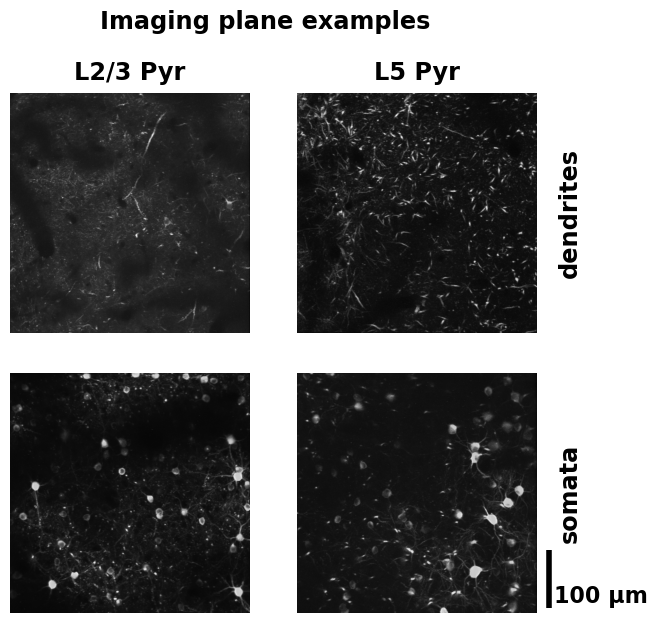

In [6]:
%run run_paper_figures.py --overwrite --figure 1 --panel B $parallel_arg --datadir $datadir --output $output

### Fig. 6A



________________________________________________________________________________
Fig. 6A (dataset paper). Running analysis and producing plot: Full session running and pupil responses.

- Minor manual formatting adjustments may be missing.
- Running and pupil images will be missing.

File will be overwritten.

Loading 1 session(s)...


100%|██████████| 1/1 [00:02<00:00,  2.39s/it]


Compiling pupil and running traces for a full session.



Figures saved under paper_figures/Fig6.
Duration: 6.66s


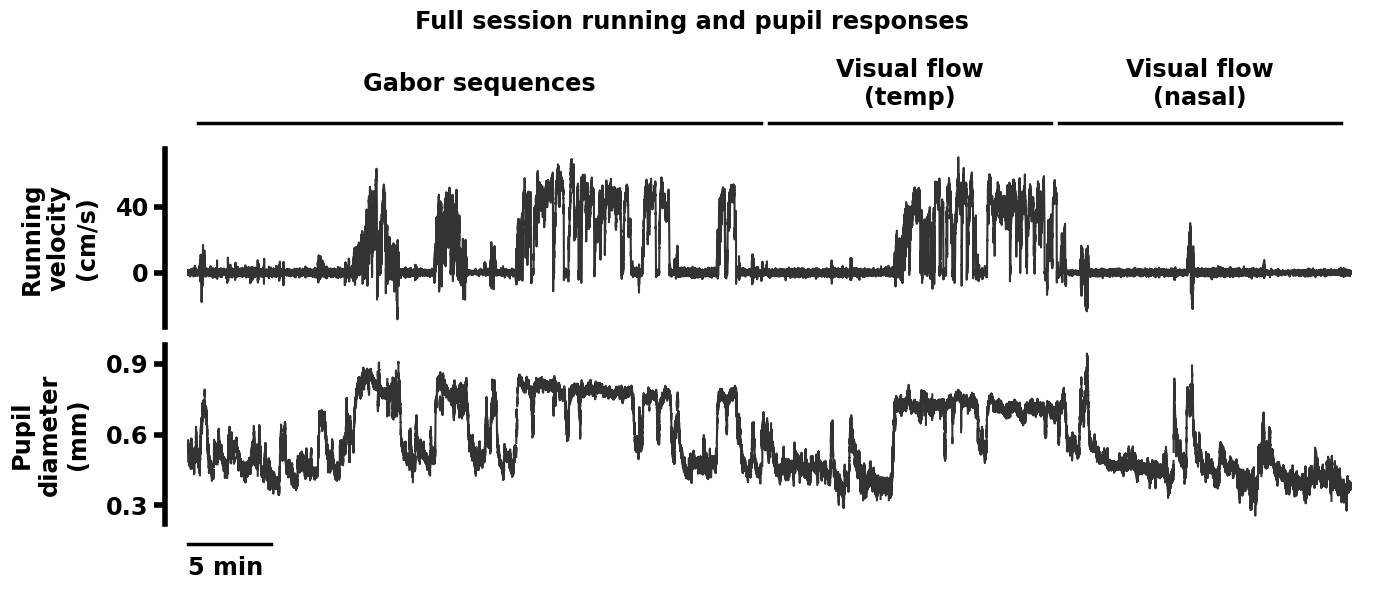

In [7]:
%run run_paper_figures.py --overwrite --figure 6 --panel A $parallel_arg --datadir $datadir --output $output

### Fig. 5B
This figure requires more time to analyse and plot. (May require too much memory for binder.)

In [ ]:
%run run_paper_figures.py --overwrite --figure 5 --panel B $parallel_arg --datadir $datadir --output $output



________________________________________________________________________________
Fig. 5B (dataset paper). Running analysis and producing plot: Example ROI responses to each unexpected Gabor sequence.

- Minor manual formatting adjustments may be missing.
- This figure panel takes longer to plot, as it requires plotting and rasterizing a large number of items.

File will be overwritten.

Loading 11 session(s)...


 64%|██████▎   | 7/11 [01:09<01:00, 15.11s/it]

### Fig. 5B, with a different random seed

By default, the script uses the same random process seed as was used for the paper. Here, however, we run the analysis with a different seed, i.e. `100`. This means that the exact traces retained may differ from those shown in the paper.

The results (analysis data and plot) are saved under a subfolder called `panels_with_diff_params`, with the seed number recorded in the file names.

In [ ]:
seed = 100
%run run_paper_figures.py --overwrite --figure 5 --panel B --seed $seed $parallel_arg --datadir $datadir --output $output

---
## 3. Final Notes

For most other figures and panels, the remaining sessions **(sessions 2 and 3)** must also be downloaded. This can be done by returning to **Step 1b**, and rerunning the download with the argument `--sess_ns 1-3`.

Notably, though, the analyses for some panels are:
- **computationally expensive** or generally **long** to run.

For this reason, they are best run on a **high performance compute device** (e.g., 16+ cores and 32+ GB of RAM).  